In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
# hahahaha lets import

In [5]:
df=pd.read_csv("adult/adult.csv")

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
# remove every data with ?
for col in df.columns:
    df[col] = df[col].replace('?', pd.NA)
rows_to_keep = []
for i in range(len(df)):
    if not df.iloc[i].isna().any():
        rows_to_keep.append(i)
df = df.iloc[rows_to_keep]
df = df.reset_index(drop=True)

In [9]:
print(df.isna().sum())   # should be all zeros if the above line has worked lessgoo

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [10]:
X = df.drop(columns=['income'])   # all input features
y = (df['income'] == '>50K').astype(int)   # binary target

In [13]:
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


In [15]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

#so basically we are converting these so that we use a number instead of a value, so like for male we can use 1 and for female 0

# one-hot encode categorical features
X_cat = pd.get_dummies(X[cat_cols], drop_first=True)

# scale numeric features
scaler = StandardScaler()
X_num = pd.DataFrame(scaler.fit_transform(X[num_cols]), columns=num_cols, index=X.index)

# combine these and we get what we want
X_prepared = pd.concat([X_num, X_cat], axis=1)

In [17]:
# traing
X_train, X_temp, y_train, y_temp = train_test_split(X_prepared, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test     = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# scikit classifier
model = MLPClassifier(hidden_layer_sizes=(64,32), activation='relu',solver='adam', learning_rate_init=1e-3,max_iter=200, random_state=42)
model.fit(X_train, y_train)

def report(name, Xr, yr):
    probs = model.predict_proba(Xr)[:,1]
    preds = (probs >= 0.5).astype(int)
    print(f"--- {name} ---")
    print("Accuracy :", accuracy_score(yr, preds))
    print("Precision:", precision_score(yr, preds))
    print("Recall   :", recall_score(yr, preds))
    print("F1       :", f1_score(yr, preds))
    print("ROC AUC  :", roc_auc_score(yr, probs))
    print("Confusion matrix:\n", confusion_matrix(yr, preds))
    print()

report("Validation", X_val, y_val)
report("Test", X_test, y_test)

--- Validation ---
Accuracy : 0.8145363408521303
Precision: 0.6186203028603477
Recall   : 0.6561570493753718
F1       : 0.6368360277136259
ROC AUC  : 0.8723876465610177
Confusion matrix:
 [[4422  680]
 [ 578 1103]]

--- Test ---
Accuracy : 0.8245872641509434
Precision: 0.6324878575283325
Recall   : 0.6972040452111838
F1       : 0.6632710809281268
ROC AUC  : 0.8822092380600325
Confusion matrix:
 [[4422  681]
 [ 509 1172]]



C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


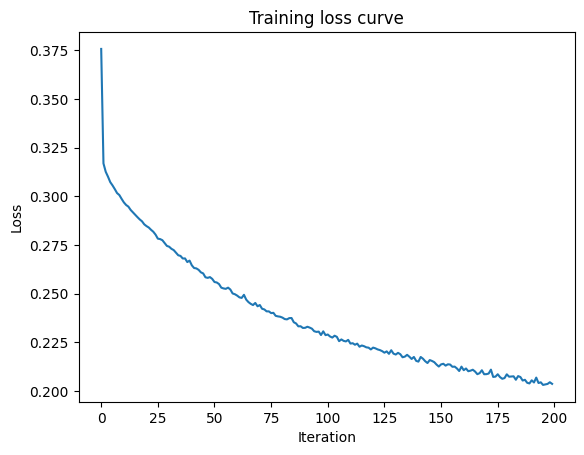

In [18]:
if hasattr(model, "loss_curve_"):
    plt.plot(model.loss_curve_)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Training loss curve")
    plt.show()